In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# drive.flush_and_unmount()

### **1.** Data Loading & Initial Exploration

In [4]:
import pandas as pd
import numpy as np

##### **1.1.** Data Loading

In [5]:
try:
  df = pd.read_csv("train.csv")
  print("Data loaded successfully!")
except FileNotFoundError:
  print("File not found. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")

Data loaded successfully!


In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

##### **1.2.** Initial Exploration

In [8]:
# df.columns
# df.info()
# df.dtypes.value_counts()
# df.isnull().sum()
# df['SalePrice'].describe()

In [9]:
#
def data_exploration(df):
  """
  Generates a comprehensive initial exploration report for a given DataFrame.
  Args:
    df (pandas.DataFrame): The input DataFrame for exploration.
  Returns:
    columns_with_missing_values_df (pandas.DataFrame): A DataFrame containing columns with missing values.
    high_missing_columns (list): A list of column names with missing values exceeding a threshold.
  """
  print("#" * 50)
  print("#            Data Exploration Report:            #")
  print("#" * 50)

  # Shape
  num_rows, num_cols = df.shape
  print(f"\n1. Dataset Shape: {num_rows} rows, {num_cols} columns")

  # Data Types Summary
  print("\n2. Data Types Summary:")
  dtypes_summary = df.dtypes.value_counts()
  for dtype, count in dtypes_summary.items():
    print(f"    - {dtype}: {count} columns")

  # Missing Value Analysis (The Critical Step)
  print("\n3. Missing Value Analysis:")
  missing_values = df.isnull().sum()
  missing_percentage = (missing_values / num_rows) * 100

  # Create a summary DataFrame for missing values
  missing_summary = pd.DataFrame({
      'Missing Values': missing_values,
      'Missing Percentage': missing_percentage
  }).sort_values(by='Missing Percentage', ascending=False)

  # Display the summary DataFrame
  # print(missing_summary)

  # Filter and display columns with missing values only
  columns_with_missing_values_df = missing_summary[missing_summary['Missing Values'] > 0]

  if not columns_with_missing_values_df.empty:
    print(f"\n   Total columns with missing values: {len(columns_with_missing_values_df)}")
    print("\n   Columns with Missing Values (Top 10):")
    print(columns_with_missing_values_df.head(10))

    # Flag high missing columns
    high_missing_columns = columns_with_missing_values_df[columns_with_missing_values_df['Missing Percentage'] > 40].index.to_list()
    if high_missing_columns:
      print(f"\n   ({len(high_missing_columns)}) columns with High Missing Values (>40%): {high_missing_columns}")
  else:
    print("   No columns have missing values.")

  # Target Variable Preview (Crucial for our business problem)
  if 'SalePrice' in df.columns:
    print("\n4. Target Variable ('SalePrice') Preview:")
    print(f"   Minimum Sale Price: ${df['SalePrice'].min():,}")
    print(f"   Maximum Sale Price: ${df['SalePrice'].max():,}")
    print(f"   Avarage Sale Price: ${df['SalePrice'].mean():,.0f}")

  return columns_with_missing_values_df, high_missing_columns if 'high_missing_columns' in locals() else []

In [10]:
missing_summary_df, high_missing_columns = data_exploration(df)

# Sampling for Initial View
print("\n5. Sampling (Stratified by a Key Categorical Column) for Initial View:")
# Using 'SaleCondition' as an example to ensure sample diversity
if 'SaleCondition' in df.columns:
  sample_df = df.groupby('SaleCondition', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)), include_groups=False)
  sample_df['SaleCondition'] = df['SaleCondition']
  print(sample_df[['SaleCondition', 'SalePrice', 'GrLivArea', 'Neighborhood']])
else:
  # First 10 columns of a random sample
  print(df.sample(10, random_state=42).iloc[:, :10])

##################################################
#            Data Exploration Report:            #
##################################################

1. Dataset Shape: 1460 rows, 81 columns

2. Data Types Summary:
    - object: 43 columns
    - int64: 35 columns
    - float64: 3 columns

3. Missing Value Analysis:

   Total columns with missing values: 19

   Columns with Missing Values (Top 10):
             Missing Values  Missing Percentage
PoolQC                 1453           99.520548
MiscFeature            1406           96.301370
Alley                  1369           93.767123
Fence                  1179           80.753425
MasVnrType              872           59.726027
FireplaceQu             690           47.260274
LotFrontage             259           17.739726
GarageYrBlt              81            5.547945
GarageCond               81            5.547945
GarageType               81            5.547945

   (6) columns with High Missing Values (>40%): ['PoolQC', 'MiscFea

### **2.** Understanding the Data Domain

##### 2.1. Define Target, Numerical, Discrete, Temporal, Ordinal, and Nominal

In [11]:
## Seperate Target Feature from the others
# Target column
target_column = 'SalePrice'

* numercal_columns
* discrete_columns
* temporal_columns

* ordinal_columns
* nominal_columns

In [12]:
# Numerical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_columns.remove(target_column)

# Discrete
discrete_columns = [
    'BsmtFullBath', 'BsmtHalfBath',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'GarageCars'
]

# Temporal
temporal_columns = [
    'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'
]

# Final Numerical
numerical_columns = [col for col in numerical_columns if col not in discrete_columns + temporal_columns]

In [13]:
# Ordinal
ordinal_columns = [
    'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
    'ExterQual', 'ExterCond', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'
]

# Nominal
nominal_columns = [
    'MSZoning', 'Street', 'Alley', 'LandContour',
    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
    'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'
]

##### 2.2. Check Nominal Features Cardinalities

In [14]:
nominal_cardinalities = {}
for col in nominal_columns:
  if col in df.columns:
    cardinality = df[col].nunique()
    nominal_cardinalities[col] = cardinality

sorted_cardinalities = dict(sorted(nominal_cardinalities.items(), key=lambda item: item[1], reverse=True))

for col, cardinality in sorted_cardinalities.items():
  if cardinality > 10:
    print(f"{col}: {cardinality} categories")

Neighborhood: 25 categories
Exterior2nd: 16 categories
Exterior1st: 15 categories


##### 2.3. Check if there is any mispeled column name

In [15]:
difined_columns = set(numerical_columns + discrete_columns + temporal_columns + ordinal_columns + nominal_columns)

existing_columns = set(df.columns)

misspelled_columns = existing_columns - difined_columns
print(f"Columns misspelled in difined columns: {misspelled_columns}")

Columns misspelled in difined columns: {'SalePrice'}


### **3.** Strategic Data Cleaning

##### 3.1. Domain-Specific Missing Value Treatment

In [16]:
print(high_missing_columns)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']


In [17]:
def imputation_strategy(df, high_missing_columns):
  """
  Create imputation strategies for different columns based on their data type.
  Args:
    df (pandas.DataFrame): The input DataFrame.
    high_missing_columns (list): A list of column names with missing values exceeding a threshold.
  Returns:
    columns_to_drop (list): A list of columns to be dropped.
    categorical_imputation (dict): A dictionary of imputation strategies for categorical columns.
    continuous_imputation (dict): A dictionary of imputation strategies for continuous columns.
  """

  print("#" * 50)
  print("#            Data Cleaining Report:            #")
  print("#" * 50)

  # Columns with meaningful "None" categories
  columns_to_protect = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

  # Columns to drop entirely
  columns_to_drop = [col for col in high_missing_columns if col not in columns_to_protect]

  # Categorical data Strategy dictionary
  all_categorical = ordinal_columns + nominal_columns
  categorical_imputation = {col: 'None' for col in all_categorical}

  # Continuous: 0 or median imputation
  continuous_imputation = {}
  for col in numerical_columns:
    if 'Area' in col or 'SF' in col or 'Porch' in col:
      continuous_imputation[col] = 0
    else:
      neighborhood_median = df.groupby('Neighborhood')[col].transform('median')

      global_median = df[col].median()

      continuous_imputation[col] = neighborhood_median.fillna(global_median).fillna(0)

  return columns_to_drop, categorical_imputation, continuous_imputation

##### 3.2. Domain-Aware Data Cleaning

In [18]:
def clean_data(df, high_missing_columns):
  """
  Clean the input DataFrame based on the provided imputation strategies.
  Args:
    df (pandas.DataFrame): The input DataFrame.
    high_missing_columns (list): A list of column names with missing values exceeding a threshold.
  Returns:
    df_cleaned (pandas.DataFrame): The cleaned DataFrame.
    log (dict): A dictionary containing the cleaning process log.
  """
  df_cleaned = df.copy()
  log = {}

  # Get imputation strategies
  columns_to_drop, categorical_imputation, continuous_imputation = imputation_strategy(df_cleaned, high_missing_columns)

  # Drop columns
  df_cleaned.drop(columns=columns_to_drop, inplace=True)
  log['columns_dropped'] = columns_to_drop

  # Before imputation, create missing value indicators
  missing_indicators = {}
  indicator_columns = [
      'GarageYrBlt', 'MasVnrArea', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2',
      'BsmtUnfSF', 'TotalBsmtSF'
  ]
  for col in indicator_columns:
    indicator_name = f"{col}_missing"
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
      df_cleaned[indicator_name] = df_cleaned[col].isnull().astype(int)
      missing_indicators[col] = indicator_name

  log['missing_indicators_created'] = list(missing_indicators.values())

  # Categorical imputation
  categorical_imputed = {}
  for col, value in categorical_imputation.items():
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
      df_cleaned[col] = df_cleaned[col].fillna(value)
      categorical_imputed[col] = value

  log['categorical_imputed'] = list(categorical_imputation.keys())

  # Continuous imputation
  continuous_imputed = {}
  for col, value in continuous_imputation.items():
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
      df_cleaned[col] = df_cleaned[col].fillna(value)
      continuous_imputed[col] = value

  log['continuous_imputed'] = list(continuous_imputation.keys())

  # Discrete imputation
  discrete_imputed = {}
  for col in discrete_columns:
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
      df_cleaned[col] = df_cleaned[col].fillna(0)
      discrete_imputed[col] = 0

  log['discrete_imputed'] = list(discrete_imputed.keys())

  # Temporal imputation
  temporal_imputed = {}
  for col in temporal_columns:
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
      if col == 'GarageYrBlt' or col == 'YearRemodAdd':
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned['YearBuilt'])
        temporal_imputed[col] = 'YearBuilt'
      elif col == 'MoSold' or col == 'YrSold':
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col] = df_cleaned[col].fillna(mode_value)
        temporal_imputed[col] = 'Mode'
      else:
        df_cleaned[col] = df_cleaned.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.median()))
        temporal_imputed[col] = 'Median'

  log['temporal_imputed'] = list(temporal_imputed.keys())

  # Final verification of missing values
  remaining_missing = df_cleaned.isnull().sum().sum()
  log['remaining_missing'] = remaining_missing
  log['cleaning_completed'] = remaining_missing == 0

  return df_cleaned, log

### **4.** Feature Engineering & Encoding Strategy

##### 4.1. Composit Features (engineering)

In [19]:
def engineer_features(df):
  """
  Create new features based on existing ones.
  Args:
    df (pandas.DataFrame): The input DataFrame.
  Returns:
    df_engineered (pandas.DataFrame): The DataFrame with engineered features.
  """

  print("#" * 50)
  print("#            Feature Engineering Report:            #")
  print("#" * 50)
  df_engineered = df.copy()

  # Aggregate features such total bathrooms and total porchs
  df_engineered['TotalBathroom'] = df_engineered['FullBath'] + 0.5 * df_engineered['HalfBath'] + df_engineered['BsmtFullBath'] + 0.5 * df_engineered['BsmtHalfBath']

  porch_cols = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
  df_engineered['TotalPorch'] = df_engineered[porch_cols].sum(axis=1)

  # Total SF
  sf_cols = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']
  df_engineered['TotalSF'] = df_engineered[sf_cols].sum(axis=1)

  # House age at sale
  df_engineered['HouseAge'] = df_engineered['YrSold'] - df_engineered['YearBuilt']

  # Remodeled age at sale
  df_engineered['RemodAge'] = df_engineered['YrSold'] - df_engineered['YearRemodAdd']
  df_engineered['RemodAge'] = df_engineered['RemodAge'].apply(lambda x: max(0, x))

  # Quality - Area SF interaction
  df_engineered['QualArea'] = df_engineered['OverallQual'] * df_engineered['TotalSF']

  return df_engineered

##### 4.2. Ordinal and Nominal Data Encoding (engineering)

In [20]:
# %pip install category_encoders

In [21]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

In [22]:
def analyze_nominal_cardinality(df, nominal_columns):
  """
  Analyze the cardinality of nominal columns in the DataFrame.
  Args:
    df (pandas.DataFrame): The input DataFrame.
    nominal_columns (list): A list of nominal columns to analyze.
  Returns:
    cardinalities (dict): A dictionary containing column names and their cardinalities.
    low_cardinality (list): A list of columns with low cardinality.
    high_cardinality (list): A list of columns with high cardinality.
  """
  cardinality_info = {}
  for col in nominal_columns:
    if col in df.columns:
      cardinality_info[col] = {
          'number_of_categories': df[col].nunique(),
          'categories': sorted(df[col].unique().tolist())
      }

  # Categorize columns based on cardinality
  low_cardinality = [col for col, info in cardinality_info.items() if info['number_of_categories'] <= 10]
  high_cardinality = [col for col, info in cardinality_info.items() if info['number_of_categories'] > 10]

  print(f"Number of columns with low cardinality (<= 10 categories): {len(low_cardinality)}")
  print(f"Number of columns with high cardinality (> 10 categories): {len(high_cardinality)}")

  return cardinality_info, low_cardinality, high_cardinality

In [23]:
# Define Ordinal Mapping
ordinal_mapping = {
    'LotShape': {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3},
    'Utilities': {'None': 0, 'ELO': 1, 'NoSeWa': 2, 'NoSeWr': 3, 'AllPub': 4},
    'LandSlope': {'None': 0, 'Sev': 1, 'Mod': 2, 'Gtl': 3},
    'ExterQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'ExterCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'HeatingQC': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Electrical': {'None': 0, 'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
    'KitchenQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Functional': {'None': 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
    'FireplaceQu': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'GarageQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'PavedDrive': {'None': 0, 'P': 1, 'Y': 2},
    'PoolQC': {'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'Fence': {'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
}

In [24]:
def create_encoding(df, ordinal_mapping, low_cardinality_nominal_columns, high_cardinality_nominal_columns):
  """
  Create encoding strategies for different columns based on their data type.
  Args:
    df (pandas.DataFrame): The input DataFrame.
    ordinal_mapping (dict): A dictionary mapping ordinal categories to numerical values.
    low_cardinality (list): A list of columns with low cardinality.
    high_cardinality (list): A list of columns with high cardinality.
  Returns:
    ordinal_encoder (OrdinalEncoder): An ordinal encoder for ordinal columns.
    low_cardinality_encoder (OneHotEncoder): A one-hot encoder for low cardinality columns.
    high_cardinality_encoder (TargetEncoder): A target encoder for high cardinality columns.
  """
  df_encoded = df.copy()
  encoders = {}

  # Ordinal encoding
  print("\nEncoding ordinal columns...")
  for col, ratings in ordinal_mapping.items():
    if col in df_encoded.columns:
      # Ensure the column is of object type before mapping, to handle 'None' string consistently
      df_encoded[col] = df_encoded[col].astype('object')
      df_encoded[col] = df_encoded[col].map(ratings)
      # Fill any NaNs that might arise from mapping new/unseen categories with the 'None' value (0)
      df_encoded[col].fillna(0, inplace=True)

  print("\nOrdinal encoding completed.")

  # One-hot encoding Low Cardinality Nominal columns
  print(f"\nOne-hot encoding {len(low_cardinality_nominal_columns)} low-cardinality columns...")
  for col in low_cardinality_nominal_columns:
    if col in df_encoded.columns:
      # Ensure the column is of object type before one-hot encoding
      df_encoded[col] = df_encoded[col].astype('object')
      # Removed handle_unknown='ignore' as it's primarily for transform, not fit_transform
      encoder = OneHotEncoder(sparse_output=False, drop='first')

      # Fit and Transform the column
      transformed_column = encoder.fit_transform(df_encoded[[col]])

      # Use get_feature_names_out for robust column naming and handling 'drop=first'
      ohe_column_names = encoder.get_feature_names_out([col])

      # Create DataFrame for the new one-hot encoded column, ensuring index alignment
      if len(ohe_column_names) > 0:
        ohe_df = pd.DataFrame(transformed_column, index=df_encoded.index, columns=ohe_column_names)

        # Concatenate the new one-hot encoded columns to the original DataFrame
        df_encoded = pd.concat([df_encoded, ohe_df], axis=1)

      # Drop original column after encoding, or if it had only one category and was skipped by OHE
      df_encoded.drop(columns=[col], inplace=True)

      # Store the encoder for future use
      encoders[f"onehot_{col}"] = encoder

  print("\nOne-hot encoding completed.")

  # Target encode high-cardinality nominal columns
  print(f"\nTarget encoding {len(high_cardinality_nominal_columns)} high-cardinality columns...")
  for col in high_cardinality_nominal_columns:
    if col in df_encoded.columns:
      # Ensure the column is of object type before target encoding
      df_encoded[col] = df_encoded[col].astype('object')
      # Initialize the encoder by specifying the column to encode
      encoder = TargetEncoder(cols=[col], smoothing=10, min_samples_leaf=5)

      # Fit and Transform the column
      # TargetEncoder expects X to be a 2D array and y to be a 1D array
      encoded_column = encoder.fit_transform(df_encoded[[col]], df_encoded[target_column])
      df_encoded[f"{col}_encoded"] = encoded_column

      # Drop original column after encoding
      df_encoded.drop(columns=[col], inplace=True)

      # Store the encoder for future use
      encoders[f"target_{col}"] = encoder

  print("\nTarget encoding completed.")

  return df_encoded, encoders

### **5.** Model Selection & Training Strategy

In [25]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [26]:
# Split data into features and target
def split_data(df, target_column):
  """
  Split the input DataFrame into features (X)
  and target variable (y).
  Args:
    df (pandas.DataFrame): The input DataFrame.
    target_column (str): The name of the target column.
  Returns:
    X (pandas.DataFrame): Features.
    y (pandas.Series): Target variable.
  """

  print("#" * 50)
  print("#            Model Selection Report:            #")
  print("#" * 50)

  X = df.drop(columns=[target_column])
  y = df[target_column]

  return X, y

# Evaluate models performance
def evaluate_models(models, X, y, cv_folds=5):
  """
  Evaluate the performance of a list of machine learning models using cross-validation.
  Args:
    models (list): A list of machine learning models to evaluate.
    X (pandas.DataFrame): Features.
    y (pandas.Series): Target variable.
    cv_folds (int): Number of folds for cross-validation.
  Returns:
    performance (dict): A dictionary containing performance metrics for each model.
    trained_models (dict): A dictionary containing trained models.
  """
  performance = {}
  trained_models = {}

  # Cross-validation setup
  kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

  for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Cross-validation scores
    neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
    rmse_scores = np.sqrt(-neg_mse_scores)

    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

    # Store average and std performance metrics
    performance[model_name] = {
        'rmse_mean': rmse_scores.mean(),
        'rmse_std': rmse_scores.std(),
        'r2_mean': r2_scores.mean(),
        'r2_std': r2_scores.std()
    }

    # Fit the model on the entire dataset
    model.fit(X, y)

    trained_models[model_name] = model

    print(f"{model_name} - Average RMSE: {rmse_scores.mean():,.0f},\n" +
          " " * (len(model_name) + 3) + f"Average R2: {r2_scores.mean():,.2f}")

  return performance, trained_models

# Select best model (based on RMSE)
def select_model(performance, trained_models):
  best_model_name = min(performance, key=lambda model_name: performance[model_name]['rmse_mean'])

  best_model = trained_models[best_model_name]

  print(f"Best model based on RMSE: {best_model_name} with RMSE = {performance[best_model_name]['rmse_mean']:,.0f}")

  return best_model

### **6.** Hyperparameter Tuning & Model Interpretability

In [27]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [28]:
# Hyperparameter tuning
def hyperparameter_tuning(model, param_grid, X, y, cv_folds=5):
  """
  Perform hyperparameter tuning for a given machine learning model.
  Args:
    model (sklearn estimator): The machine learning model to tune.
    param_grid (dict): A dictionary of hyper
    parameters and their respective values to search over.
    X (pandas.DataFrame): Features.
    y (pandas.Series): Target variable.
    cv_folds (int): Number of folds for cross-validation.
  Returns:
    random_search (RandomizedSearchCV): The trained RandomizedSearchCV object.
    training_stats (dict): A dictionary containing training statistics.
    X_train (pandas.DataFrame): Training features.
    X_test (pandas.DataFrame): Testing features.
  """
  print("#" * 50)
  print("#            Hyperparameter Tuning Report:            #")
  print("#" * 50)

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

  # Collect training statistics for future use
  train_median = X_train.median()
  train_mode = X_train.mode()
  training_stats = {
      'medians': train_median.to_dict(),
      'modes': train_mode.iloc[0].to_dict()
  }

  # Initialize RandomizedSearchCV
  random_search = RandomizedSearchCV(
      estimator=model,
      param_distributions=param_grid,
      n_iter=50,
      scoring='neg_mean_squared_error',
      n_jobs=-1,
      cv=cv_folds,
      random_state=42,
      return_train_score=True
  )

  # Fit the model
  random_search.fit(X_train, y_train)

  print(f"\nBest parameters found: {random_search.best_params_}")

  return random_search, training_stats, X_train, X_test, y_train, y_test

# Get feature importance
def get_feature_importance(model, X_train):
  """
  Get feature importance for a trained machine learning model.
  Args:
    model (sklearn estimator): The trained machine learning model.
    X_train (pandas.DataFrame): Features used for training.
  Returns:
    feature_importance_df (pandas.DataFrame): A DataFrame containing feature importance scores.
  """
  feature_importance = model.feature_importances_
  feature_importance_df = pd.DataFrame({
      'Feature': X_train.columns,
      'Importance': feature_importance
  }).sort_values(by='Importance', ascending=False)

  print(f"\nTop 20 Feature Importances:")
  print(feature_importance_df.head(20).to_string())

  return feature_importance_df

In [29]:
# %pip install shap

In [30]:
import shap
import matplotlib.pyplot as plt

In [50]:
# Local interpretation with SHAP values
def local_interpretation(model, X_test):
  """
  Perform local interpretation using SHAP values on a trained machine learning model.
  Args:
    model (sklearn estimator): The trained machine learning model.
    X_test (pandas DataFrame): Features used for testing.
  """
  random_index = np.random.randint(0, X_test.shape[0])

  #
  instance = X_test.iloc[random_index]

  # Visualize SHAP plot for the selected instance
  print(f"\nGenerating SHAP plot for instance inded: {random_index}")

  # Initialize the explainer
  explainer = shap.TreeExplainer(model)

  shap_values = explainer.shap_values(instance)
  # print(f"SHAP values for instance {random_index}: \n{shap_values}")
  # print(f"Shap values type: {type(shap_values)}")
  # for i, _ in enumerate(shap_values):
  #   print(f"Shap value [{i}]: {shap_values[i]}")
  #   print(f"Shap value [0][{i}]: {shap_values[0][i]}")
  print(X_test.iloc[random_index].to_dict())
  
  shap.initjs()
  shap.force_plot(
      explainer.expected_value,
      shap_values,
      features=instance,
      matplotlib=True,
      show=False
  )

  plt.title(f"SHAP Plot for Instance {random_index}", fontsize=16)
  plt.show()

  explanation = []
  for i, feature in enumerate(X_test.columns.to_list()):
    dollar_impact = shap_values[i] # Fixed: Access shap_values directly
    if abs(dollar_impact) > 1000:
      explanation.append({
          'feature': feature,
          'impact': dollar_impact,
          'contribution': 'increase' if dollar_impact > 0 else 'decrease'
      })

  explanation = sorted(explanation, key=lambda x: abs(x['impact']), reverse=True)

  explanation_df = pd.DataFrame(explanation)
  print(explanation_df.to_string(index=False))

### **Test**

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
missing_summary_df, high_missing_columns = data_exploration(df)

columns_to_drop, categorical_imputation, continuous_imputation = imputation_strategy(df, high_missing_columns)

df_cleaned, log = clean_data(df, high_missing_columns)

df_engineered = engineer_features(df_cleaned)

# Fix: Pass the actual nominal_columns to analyze_nominal_cardinality
cardinality_info, low_cardinality, high_cardinality = analyze_nominal_cardinality(df_engineered, nominal_columns)

df_encoded, encoders = create_encoding(df_engineered, ordinal_mapping, low_cardinality, high_cardinality)

X, y = split_data(df_encoded, target_column)

models = {
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

performance, trained_models = evaluate_models(models, X, y, cv_folds=5)

best_model = select_model(performance, trained_models)

##################################################
#            Data Exploration Report:            #
##################################################

1. Dataset Shape: 1460 rows, 81 columns

2. Data Types Summary:
    - object: 43 columns
    - int64: 35 columns
    - float64: 3 columns

3. Missing Value Analysis:

   Total columns with missing values: 19

   Columns with Missing Values (Top 10):
             Missing Values  Missing Percentage
PoolQC                 1453           99.520548
MiscFeature            1406           96.301370
Alley                  1369           93.767123
Fence                  1179           80.753425
MasVnrType              872           59.726027
FireplaceQu             690           47.260274
LotFrontage             259           17.739726
GarageYrBlt              81            5.547945
GarageCond               81            5.547945
GarageType               81            5.547945

   (6) columns with High Missing Values (>40%): ['PoolQC', 'MiscFea

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search, training_stats, X_train, X_test, y_train, y_test  = hyperparameter_tuning(best_model, param_grid, X, y, cv_folds=5)

model = random_search.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

feature_importance_df = get_feature_importance(model, X_train)

##################################################
#            Hyperparameter Tuning Report:            #
##################################################

Best parameters found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}

Top 20 Feature Importances:
                  Feature  Importance
66               QualArea    0.834244
153  Neighborhood_encoded    0.035223
63                TotalSF    0.011640
21              BsmtUnfSF    0.007929
3                 LotArea    0.007727
18             BsmtFinSF1    0.007568
43             GarageArea    0.006651
2             LotFrontage    0.005991
28              GrLivArea    0.005505
26               2ndFlrSF    0.005338
61          TotalBathroom    0.005030
65               RemodAge    0.003893
10           YearRemodAdd    0.003121
42             GarageCars    0.003023
47             WoodDeckSF    0.002994
40            GarageYrBlt    0.002640
25               1stFlrSF    0.002600



Generating SHAP plot for instance inded: 30
{'Id': 185.0, 'MSSubClass': 50.0, 'LotFrontage': 92.0, 'LotArea': 7438.0, 'LotShape': 2.0, 'Utilities': 4.0, 'LandSlope': 3.0, 'OverallQual': 5.0, 'OverallCond': 8.0, 'YearBuilt': 1908.0, 'YearRemodAdd': 1991.0, 'MasVnrArea': 0.0, 'ExterQual': 3.0, 'ExterCond': 3.0, 'BsmtQual': 2.0, 'BsmtCond': 3.0, 'BsmtExposure': 1.0, 'BsmtFinType1': 1.0, 'BsmtFinSF1': 0.0, 'BsmtFinType2': 1.0, 'BsmtFinSF2': 0.0, 'BsmtUnfSF': 504.0, 'TotalBsmtSF': 504.0, 'HeatingQC': 4.0, 'Electrical': 5.0, '1stFlrSF': 936.0, '2ndFlrSF': 316.0, 'LowQualFinSF': 0.0, 'GrLivArea': 1252.0, 'BsmtFullBath': 0.0, 'BsmtHalfBath': 0.0, 'FullBath': 1.0, 'HalfBath': 0.0, 'BedroomAbvGr': 3.0, 'KitchenAbvGr': 1.0, 'KitchenQual': 3.0, 'TotRmsAbvGrd': 5.0, 'Functional': 8.0, 'Fireplaces': 0.0, 'FireplaceQu': 0.0, 'GarageYrBlt': 1986.0, 'GarageFinish': 1.0, 'GarageCars': 2.0, 'GarageArea': 576.0, 'GarageQual': 3.0, 'GarageCond': 3.0, 'PavedDrive': 2.0, 'WoodDeckSF': 104.0, 'OpenPorchSF': 

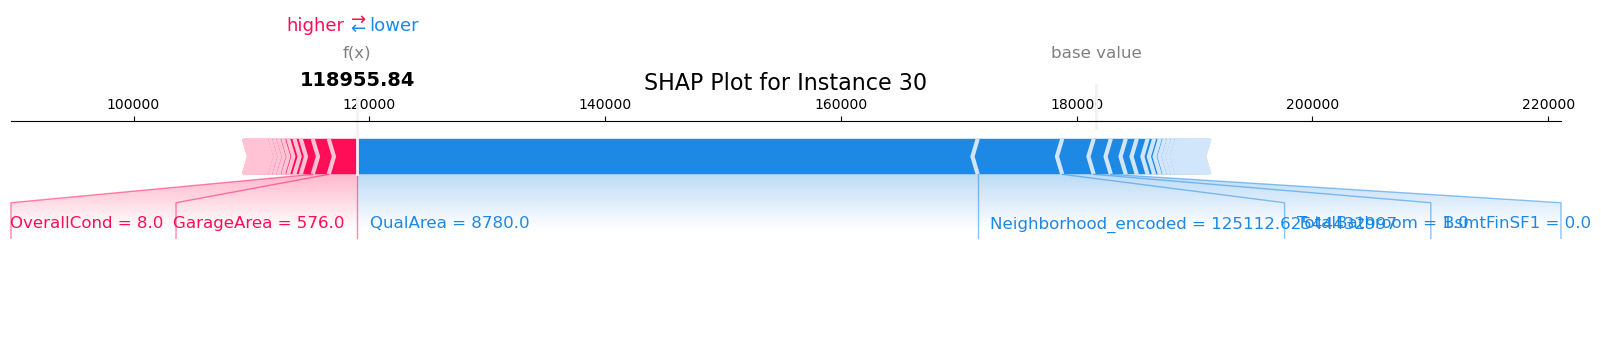

             feature        impact contribution
            QualArea -52651.650307     decrease
Neighborhood_encoded  -7166.585220     decrease
       TotalBathroom  -2668.700667     decrease
          GarageArea   2402.451447     increase
          BsmtFinSF1  -1454.286147     decrease
         OverallCond   1354.313941     increase
            HouseAge  -1269.307432     decrease
         GarageYrBlt   1015.541038     increase


In [53]:
local_interpretation(model, X_test)

### **7.** Deployment Pipeline & Model Interpretability

#### **The Pipeline**

class HousePricePredictor:
  def __init__(self, model, encoders, training_stats, feature_list, ordinal_mapping):
    # Store everything needed for prediction
    self.model = model
    self.encoders = encoders    # saved encoders
    self.training_stats = training_stats    # medians/modes from training
    self.feature_list = feature_list
    self.ordinal_mapping = ordinal_mapping

  def predict(self, data):
    # Add missing features using training_stats
    aligned_data = self._align_features(data)

    # Apply preprocessing using saved encoders
    processed_data = self._apply_encoders(aligned_data)

    # Make predictions
    predictions = self.model.predict(processed_data)

    return predictions

  def _align_features(self, data):
    aligned = pd.DataFrame(columns=self.feature_list)

    for feature in self.feature_list:
      if feature in data.columns:
        aligned[feature] = data[feature]
      else:
        # Use training median/mode
        if feature in self.training_stats['medians']:
          aligned[feature] = self.training_stats['medians'][feature]
        elif feature in self.training_stats['modes']:
          aligned[feature] = self.training_stats['modes'][feature]
        else:
          aligned[feature] = 0

    return aligned

    def _apply_encoders(self, data):
      processed = data.copy()

      # Ordinal mapping
      for col, ratings in self.ordinal_mapping.items():
        if col in processed.columns:
          processed[col] = processed[col].map(ratings)
          processed[col].fillna(0, inplace=True)

      # Nominal encoding
      for encoder_name, encoder in self.encoders.items():
        if 'onehot' in encoder_name:
          col_name = encoder_name.split('_')[1]
          processed[col_name] = encoder.transform(processed[[col_name]])
        elif 'target' in encoder_name:
          col_name = encoder_name.split('_')[1]
          processed[f'{col_name}_encoded'] = encoder.transform(processed[[col_name]])

      return processed

    def _explain_prediction(self, data):
      processed = self._apply_encoders(data)
      explainer = shap.TreeExplainer(self.model)
      shap_values = explainer.shap_values(processed)

      explanation = []
      for i, feature in enumerate(processed.columns.to_list()):
        dollar_impact = shap_values[i]
        if abs(dollar_impact) > 1000:
          explanation.append({
              'feature': feature,
              'impact': dollar_impact,
              'contribution': 'increase' if dollar_impact > 0 else 'decrease'
          })

      explanation = sorted(explanation, key=lambda x: abs(x['impact']), reverse=True)

      return explanation

    def _predict_with_explanation(self, data):
      prediction = self.predict(data)
      explanation = self._explain_prediction(data)

      return prediction, explanation

#### **Export or save the Pipeline**

In [43]:
import joblib
from train import HousePricePredictor, get_raw_training_stats

In [44]:
raw_training_stats = get_raw_training_stats(df_engineered, target_column)

pipeline = HousePricePredictor(
    model=model,
    encoders=encoders,
    training_stats=raw_training_stats,
    feature_list=X_train.columns.to_list(),
    ordinal_mapping=ordinal_mapping
)

joblib.dump(pipeline, "pipeline.pkl")
print(f"\nPipeline saved with {len(X_train.columns)} features.")


Pipeline saved with 156 features.


#### **The App**

In [38]:
# %pip install --ignore-installed blinker==1.7.0 # Install a compatible version of blinker, ignoring any existing problematic installations
# %pip install streamlit